# Object clasification

Reference:  https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

## Packages

In [ ]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 2.6MB/s 


In [ ]:
# These are the packages of the model 

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
from keras.preprocessing import image
from keras import backend as K
from pathlib import Path
import glob
import math
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow.python.framework import ops
from numpy import asarray
import cv2
%matplotlib inline
import keras_preprocessing



## Images for the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Cuberteria'

train_Cucharas_dir = os.path.join(base_dir, 'Cucharas')
train_Cuchillos_dir = os.path.join(base_dir, 'Cuchillos')
train_Tenedores_dir = os.path.join(base_dir, 'Tenedores')

train_Cucharas_files = os.listdir( train_Cucharas_dir )
train_Cuchillos_files = os.listdir( train_Cuchillos_dir )
train_Tenedores_files = os.listdir( train_Tenedores_dir )

print('total training Cucharas images :', len(os.listdir(train_Cucharas_dir)))
print('total training Cuchillos images :', len(os.listdir(train_Cuchillos_dir)))
print('total training Tenedores images :', len(os.listdir(train_Tenedores_dir)))

total training Cucharas images : 20
total training Cuchillos images : 20
total training Tenedores images : 20


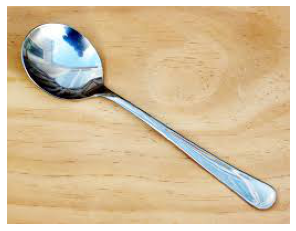

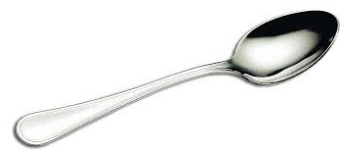

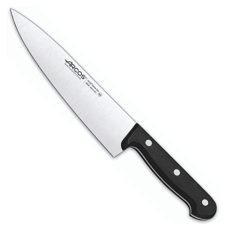

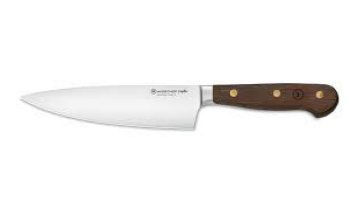

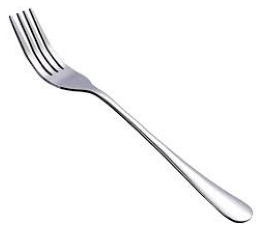

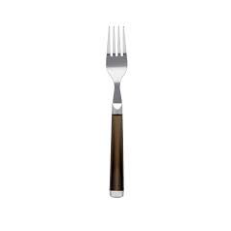

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_cucharas = [os.path.join(train_Cucharas_dir, fname) 
                for fname in train_Cucharas_files[pic_index-2:pic_index]]
next_cuchillos = [os.path.join(train_Cuchillos_dir, fname) 
                for fname in train_Cuchillos_files[pic_index-2:pic_index]]
next_tenedores = [os.path.join(train_Tenedores_dir, fname) 
                for fname in train_Tenedores_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_cucharas+next_cuchillos+next_tenedores):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Train and validation set

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/Cuberteria"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/Cuberteria_test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150, 150),
	class_mode='categorical',
  batch_size=15
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150, 150),
	class_mode='categorical',
  batch_size=2
)

Found 59 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


## Deep learning model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers 
from tensorflow.keras.applications import ResNet50
import efficientnet.keras as efn

#base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

#base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

#base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
#                   include_top = False, # Leave out the last fully connected layer
#                   weights = 'imagenet')

base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

x = layers.Dense(256, activation='relu')(x)

# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(3, activation="softmax", name="classification")(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
___________________________________________________________________________________________

## Tain the model

In [ ]:
# this will take around 20 minutes to complete
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10)


Epoch 1/10
1/4 [======>.......................] - ETA: 17s - loss: 1.7835 - accuracy: 0.3333

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 10s 1s/step - loss: 4.1430 - accuracy: 0.3403 - val_loss: 1.5972 - val_accuracy: 0.6667
Epoch 2/10
4/4 [==============================] - 3s 867ms/step - loss: 1.9616 - accuracy: 0.5167 - val_loss: 0.3184 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 3s 853ms/step - loss: 0.4749 - accuracy: 0.8392 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 4s 879ms/step - loss: 0.5526 - accuracy: 0.8230 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 4s 881ms/step - loss: 0.3723 - accuracy: 0.8813 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 3s 857ms/step - loss: 0.4998 - accuracy: 0.8347 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 4s 887ms/step - loss: 0.1922 - accuracy: 0.9186 - val_loss: 0.3888 - val_accuracy: 0.8333
Epoch 8/10
4/4 [=================

## Results

In [ ]:
model.save('cuberteria.h5')

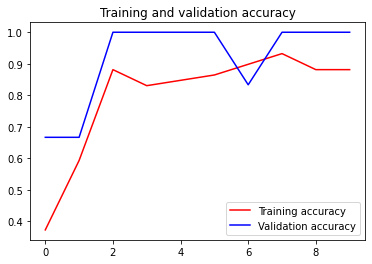

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Predictions

In [ ]:
new_model = tf.keras.models.load_model('cuberteria.h5')

In [ ]:
image = Image.open('tenedor_test_1.jpg')
x = image.resize((150, 150))
x = np.expand_dims(x, axis=0)/255
classes = new_model.predict(x)
print(classes)

[[1.2381633e-03 2.1520177e-04 9.9854666e-01]]
